In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("VaryingFileSize-Sheet1.csv")

In [3]:
data

,Attributes,8mbDDR,8mbPIM,16mbDDR,16mbPIM,32mbDDR,32MBPIM,64mbDDR,64mbPIM
0,system.cpu.icache.overall_accesses::total,1.739171e+09,1.750000e+04,3.477038e+09,1.843500e+04,6.952773e+09,2.031100e+04,1.390424e+10,2.409700e+04
1,system.cpu.dcache.overall_accesses::total,6.973393e+08,6.496000e+03,1.393634e+09,6.754000e+03,2.786224e+09,7.274000e+03,5.571403e+09,8.322000e+03
2,system.l2.overall_accesses::total,3.943530e+05,9.720000e+02,6.565950e+05,9.760000e+02,1.181006e+06,9.870000e+02,2.229836e+06,1.005000e+03
3,system.l2.overall_miss_latency::total,3.773538e+10,1.380270e+08,6.336064e+10,1.385750e+08,1.145996e+11,1.401500e+08,2.170994e+11,1.427830e+08
4,system.membus.reqLayer0.occupancy,1.511455e+09,9.710000e+03,2.560560e+09,9.750000e+03,4.658234e+09,9.860000e+03,8.853622e+09,1.004000e+04
5,system.membus.respLayer0.occupancy,2.106162e+09,4.855000e+04,3.516958e+09,4.875000e+04,6.338050e+09,4.930000e+04,1.198062e+10,5.020000e+04
6,system.cpu.numCycles,4.911939e+09,1.888020e+05,9.806675e+09,1.917460e+05,1.959614e+10,1.981490e+05,3.917508e+10,2.104970e+05
7,system.l2.overall_hits::total,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
8,system.l2.overall_misses::total,3.943500e+05,9.710000e+02,6.565920e+05,9.750000e+02,1.181003e+06,9.860000e+02,2.229833e+06,1.004000e+03
9,system.membus.power_state.pwrStateResidencyTicks,4.911939e+12,4.818339e+12,9.806675e+12,9.620962e+12,1.959614e+13,1.922620e+13,3.917508e+13,3.843667e+13


In [4]:
data.rename(columns = {'8mbDDR':'DDR_8MB', '8mbPIM':'PIM_8MB', 
                    '16mbDDR':'DDR_16MB', '16mbPIM':'PIM_16MB','32mbDDR':'DDR_32MB','32MBPIM':'PIM_32MB',
                    '64mbDDR':'DDR_64MB', '64mbPIM':'PIM_64MB'}, inplace = True) 

In [5]:
data["Attributes"][7]

'system.l2.overall_hits::total '

In [6]:
plt.rcParams['figure.figsize'] = (12,9)
workloads = ['8MB','16MB','32MB','64MB']

In [7]:
def bargraph(attr,st):
    li = data.loc[data["Attributes"]==attr]
    for index, rows in li.iterrows(): 
        li_values = [rows.DDR_8MB, rows.PIM_8MB, rows.DDR_16MB, rows.PIM_16MB, 
                  rows.DDR_32MB, rows.PIM_32MB, rows.DDR_64MB, rows.PIM_64MB]
    
    plt.bar(workloads, li_values[1::2], color ='red', width = 0.5)
    plt.xticks([0,1,2,3])
    plt.title(st+" of PIM with different workloads", fontsize=18) 
    plt.xlabel('Workload sizes (bytes)', fontsize=16)
    plt.show()

    plt.bar(workloads, li_values[::2], color ='red', width = 0.5)
    plt.xticks([0,1,2,3])
    plt.title(st+" of DDR with different workloads", fontsize=18) 
    plt.xlabel('Workload sizes (bytes)', fontsize=16)
    plt.show()
    
def groupedbar(attr,st):
    pos = list(range(4)) 
    width = 0.25 
    li = data.loc[data["Attributes"]==attr]
    for index, rows in li.iterrows(): 
        li_values = [rows.DDR_8MB, rows.PIM_8MB, rows.DDR_16MB, rows.PIM_16MB, 
                  rows.DDR_32MB, rows.PIM_32MB, rows.DDR_64MB, rows.PIM_64MB]

    fig, ax = plt.subplots(figsize=(12,9))
    plt.bar(pos, li_values[::2], width, alpha=0.5, color='red') 
    plt.bar([p + width for p in pos], li_values[1::2], width, alpha=0.5, color='blue') 

    ax.set_title( st+' comparison', fontsize=18)
    ax.set_xticks([p + 0.5 * width for p in pos])
    ax.set_xticklabels(workloads)

    plt.legend(['DDR','PIM'], loc='upper left')
    plt.xlabel('Workload sizes (bytes)',fontsize=16)
    # plt.grid()
    plt.show()

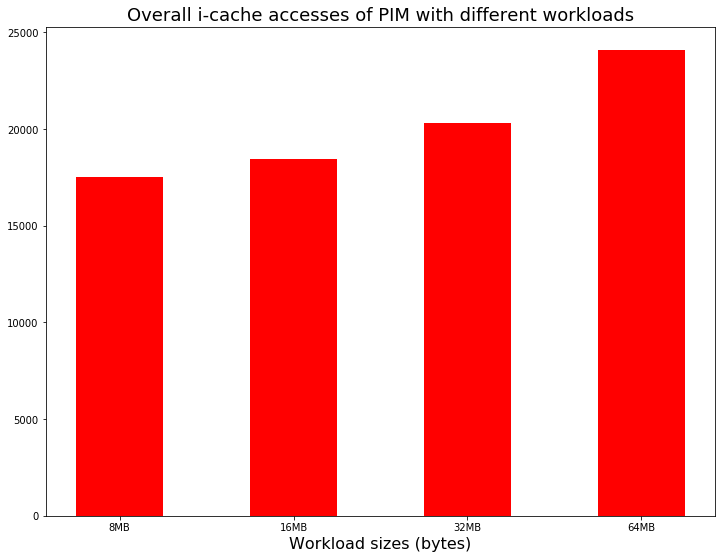

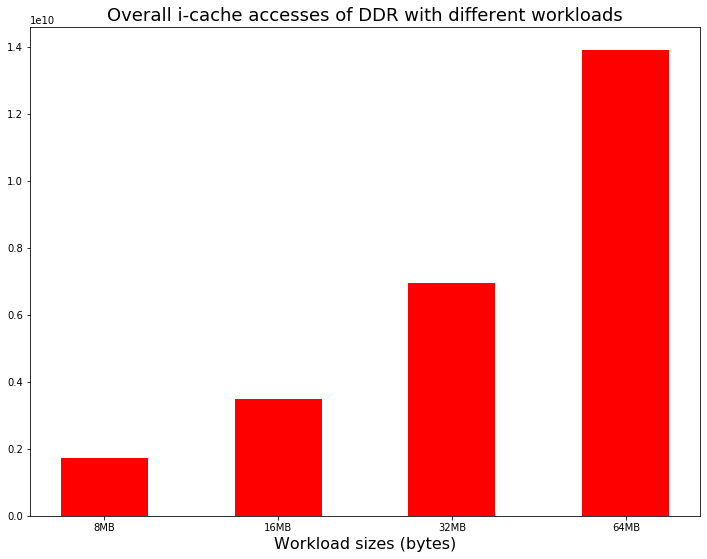

In [8]:
bargraph("system.cpu.icache.overall_accesses::total", "Overall i-cache accesses")

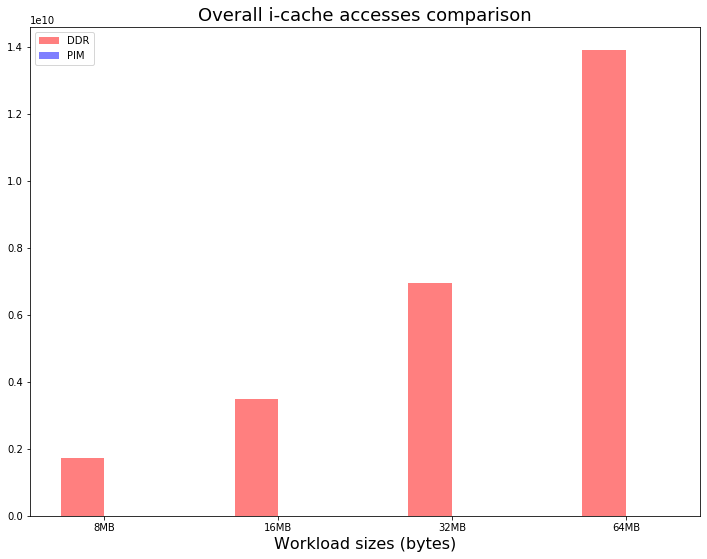

In [9]:
groupedbar("system.cpu.icache.overall_accesses::total", "Overall i-cache accesses")

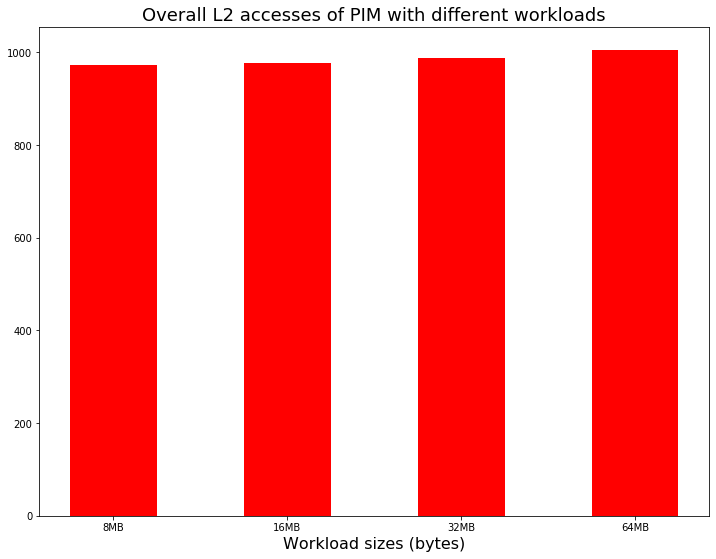

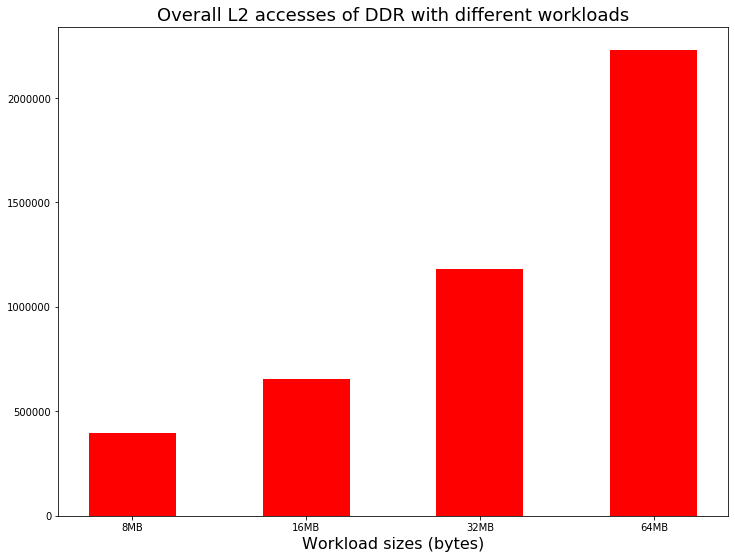

In [10]:
bargraph("system.l2.overall_accesses::total", "Overall L2 accesses")

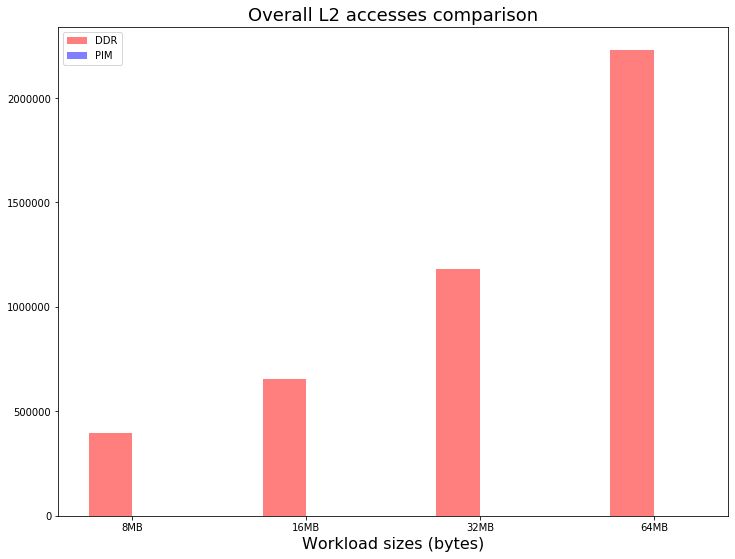

In [11]:
groupedbar("system.l2.overall_accesses::total", "Overall L2 accesses")

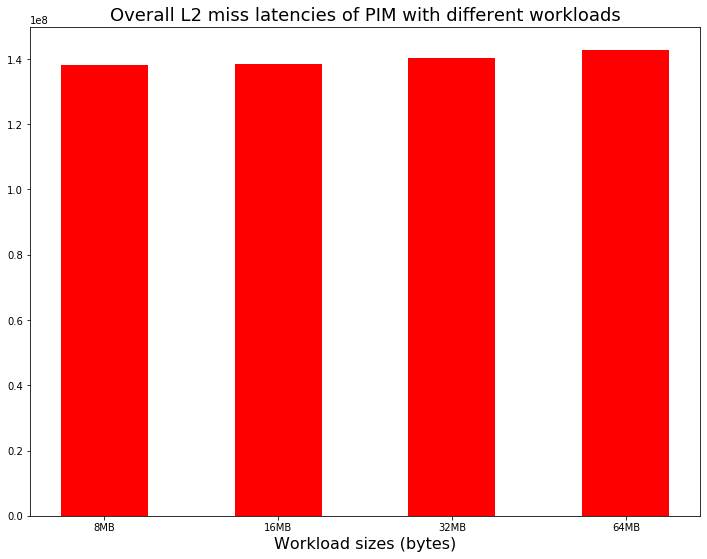

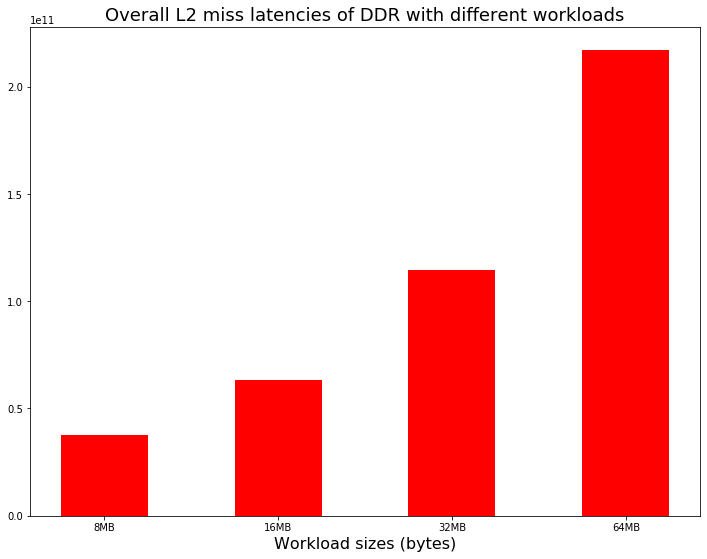

In [12]:
bargraph("system.l2.overall_miss_latency::total", "Overall L2 miss latencies")

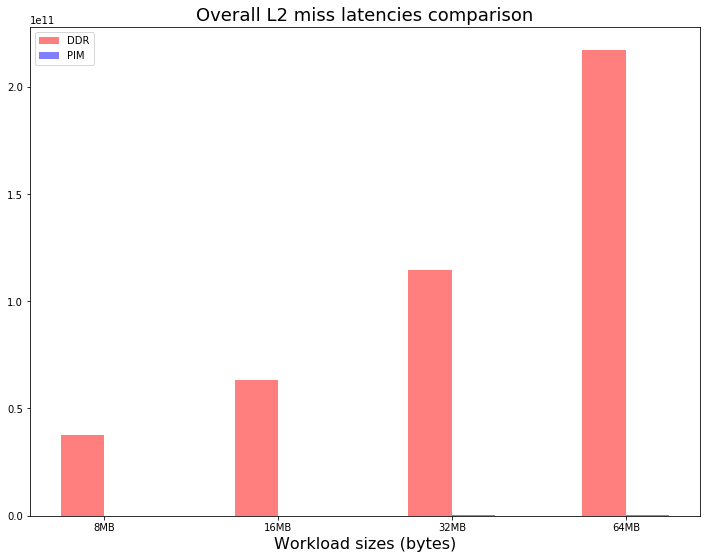

In [13]:
groupedbar("system.l2.overall_miss_latency::total", "Overall L2 miss latencies")

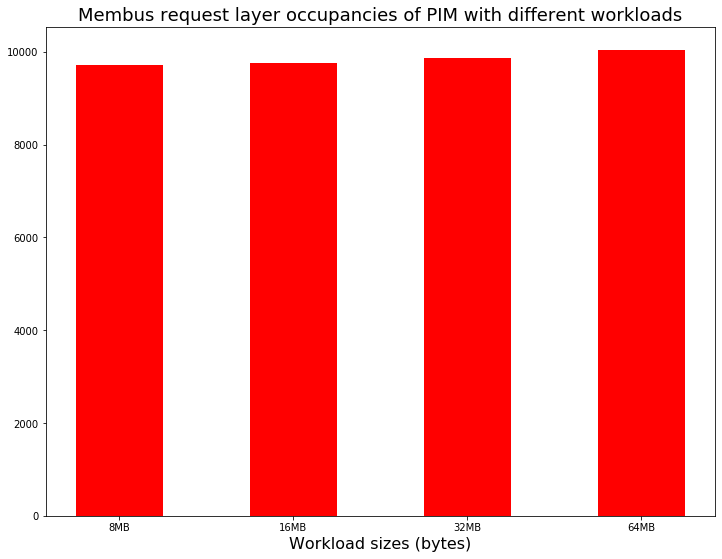

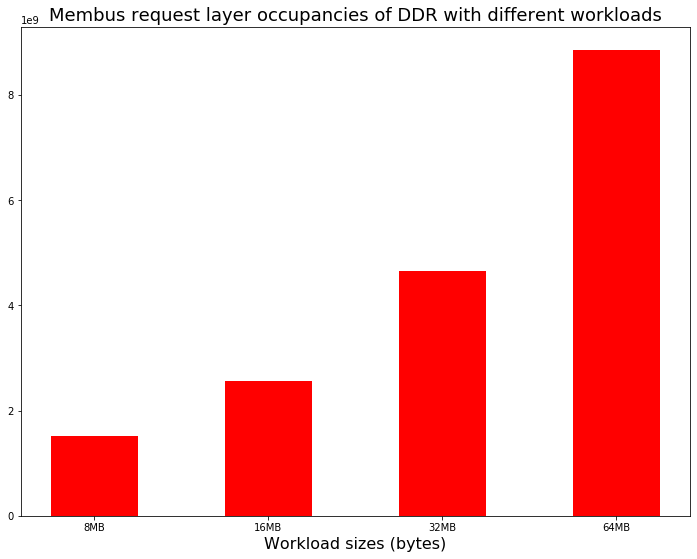

In [14]:
bargraph("system.membus.reqLayer0.occupancy", "Membus request layer occupancies")

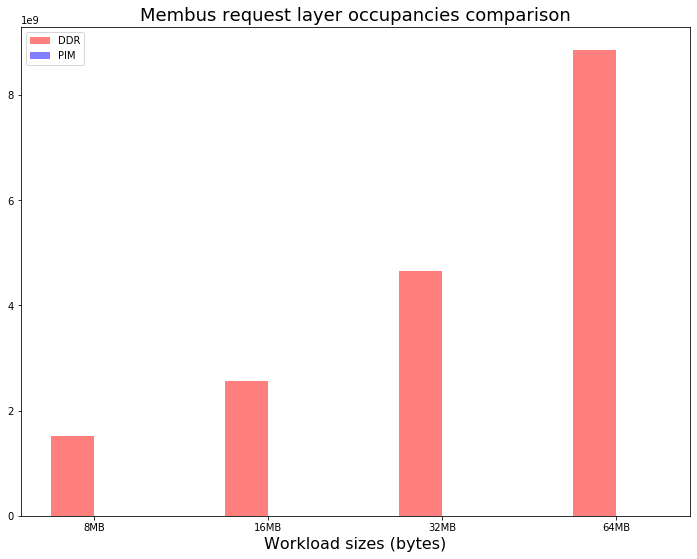

In [15]:
groupedbar("system.membus.reqLayer0.occupancy", "Membus request layer occupancies")

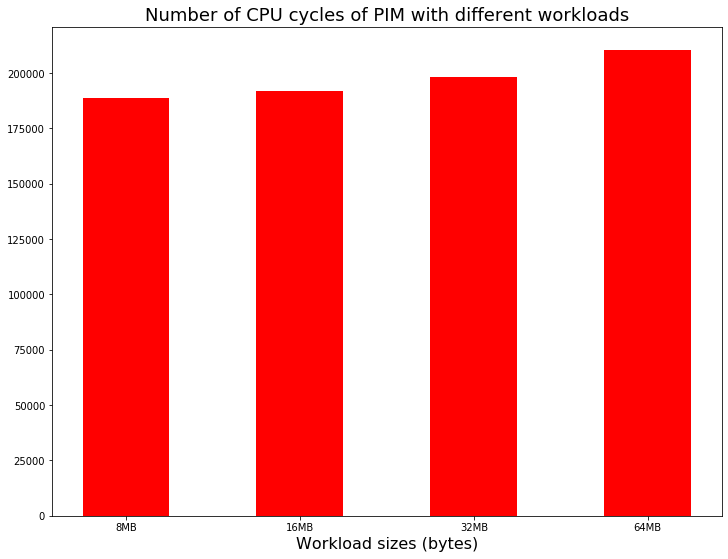

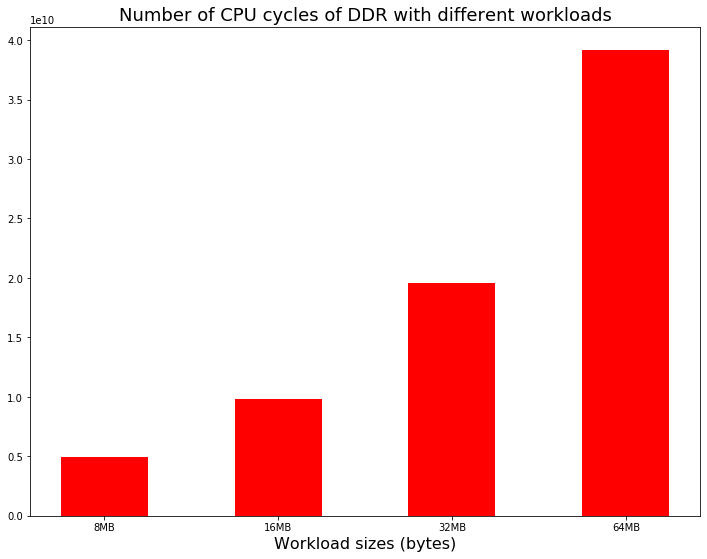

In [16]:
bargraph("system.cpu.numCycles", "Number of CPU cycles")

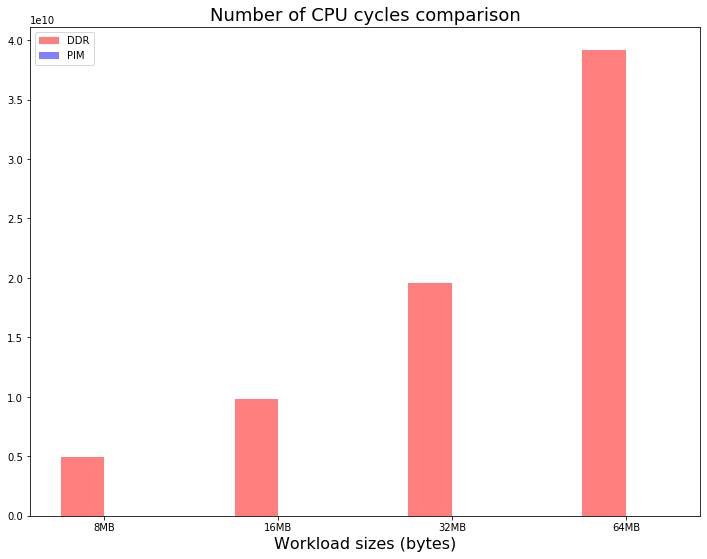

In [17]:
groupedbar("system.cpu.numCycles", "Number of CPU cycles")

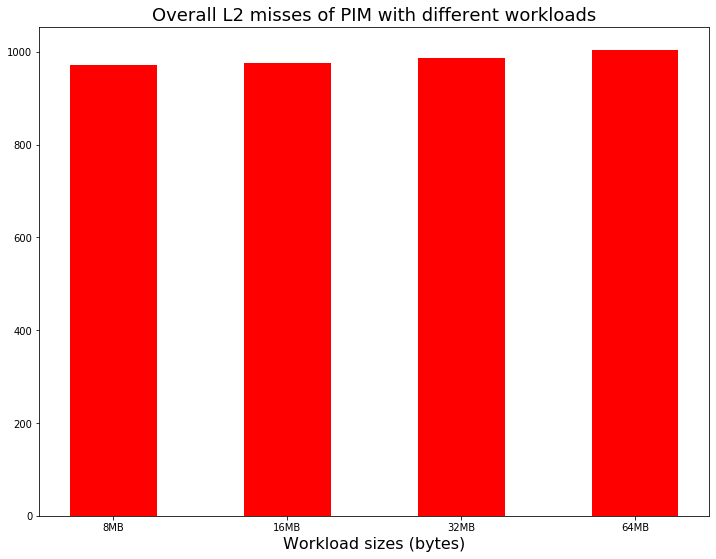

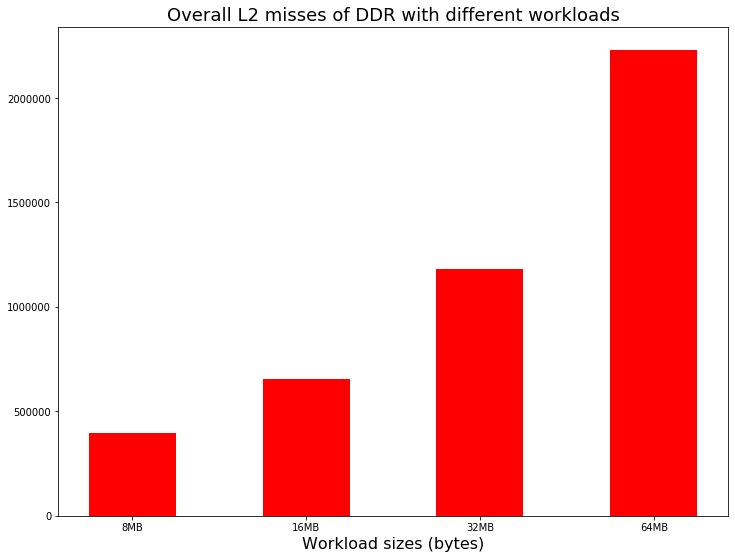

In [18]:
bargraph("system.l2.overall_misses::total", "Overall L2 misses")

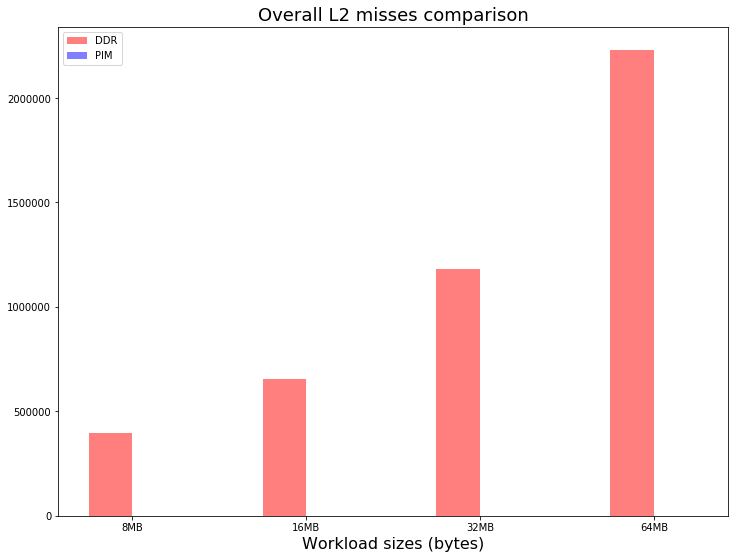

In [19]:
groupedbar("system.l2.overall_misses::total", "Overall L2 misses")

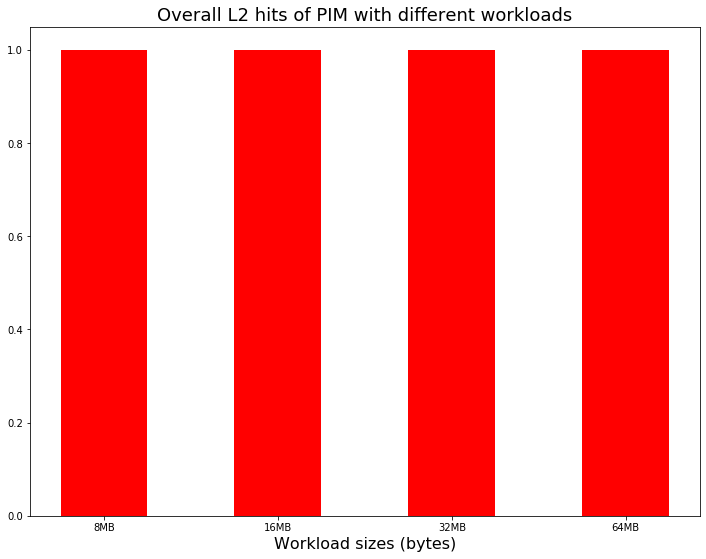

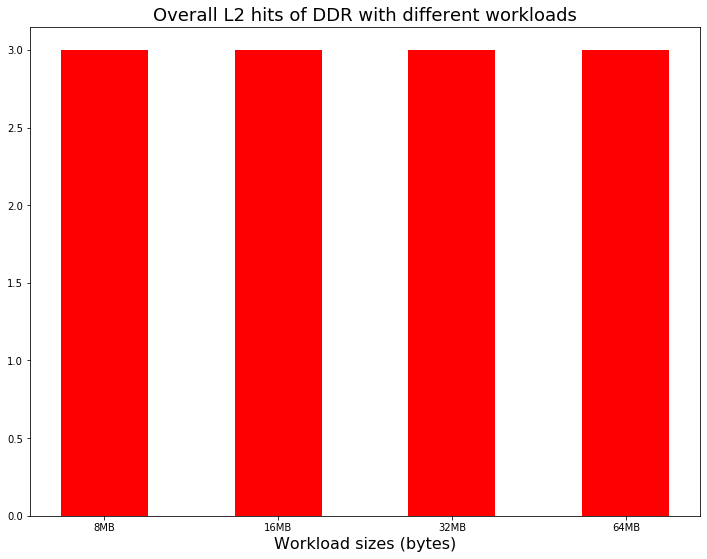

In [20]:
bargraph(data["Attributes"][7], "Overall L2 hits")

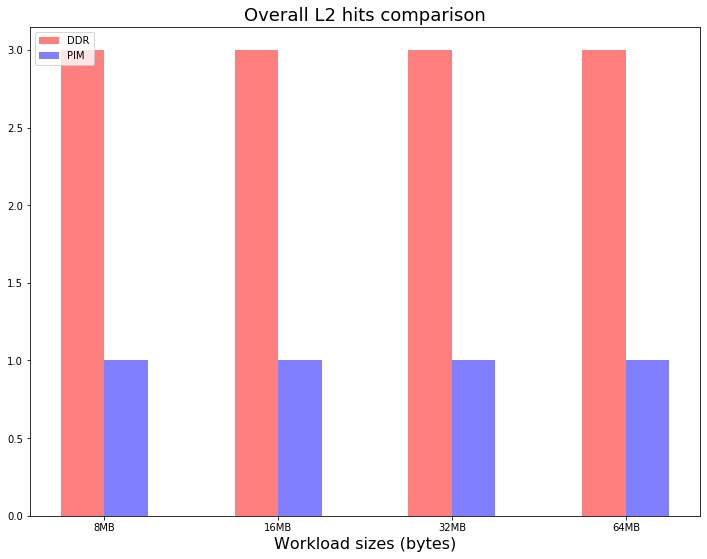

In [21]:
groupedbar(data["Attributes"][7], "Overall L2 hits")

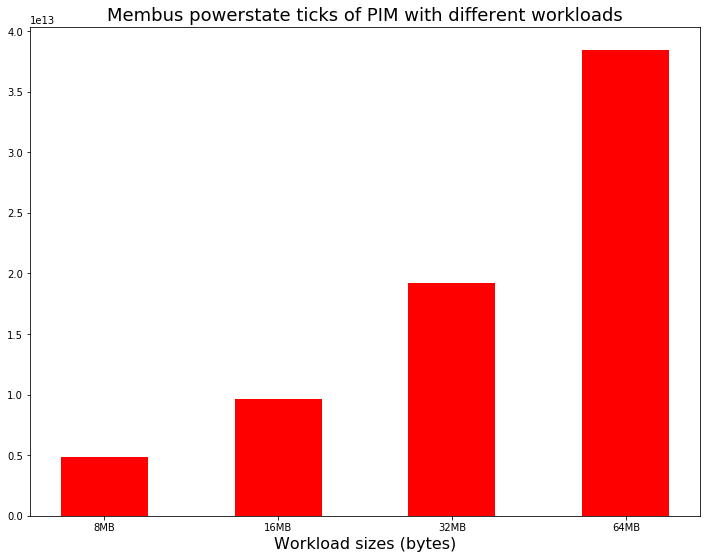

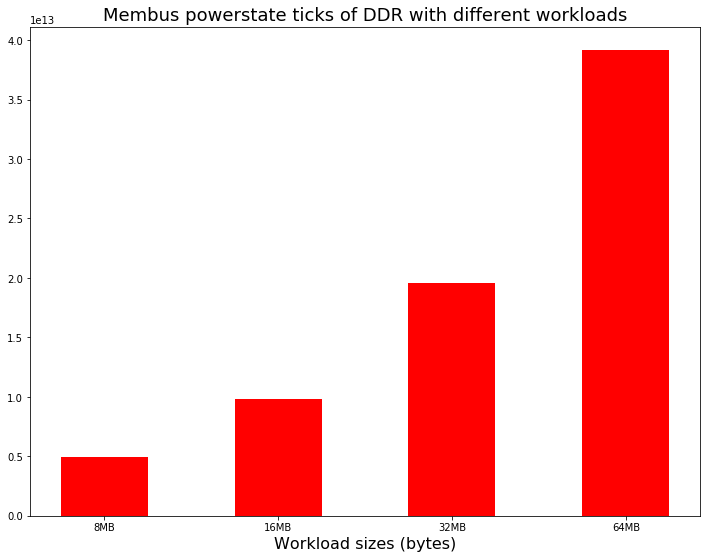

In [22]:
bargraph(data["Attributes"][9], "Membus powerstate ticks")

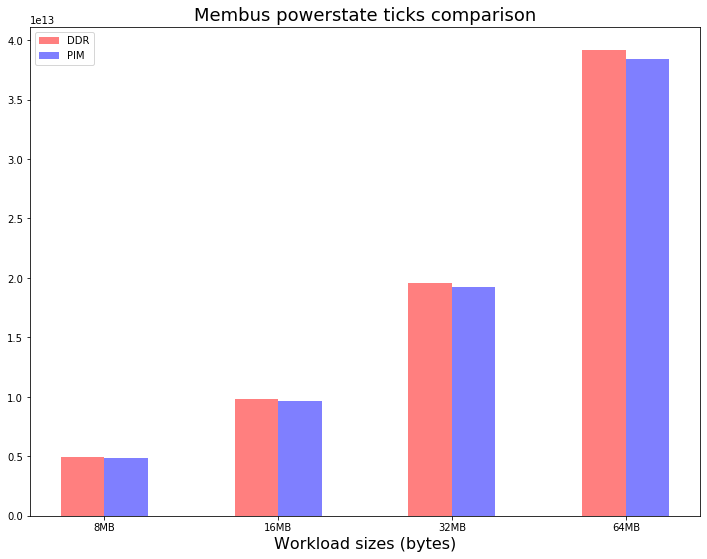

In [23]:
groupedbar(data["Attributes"][9], "Membus powerstate ticks")

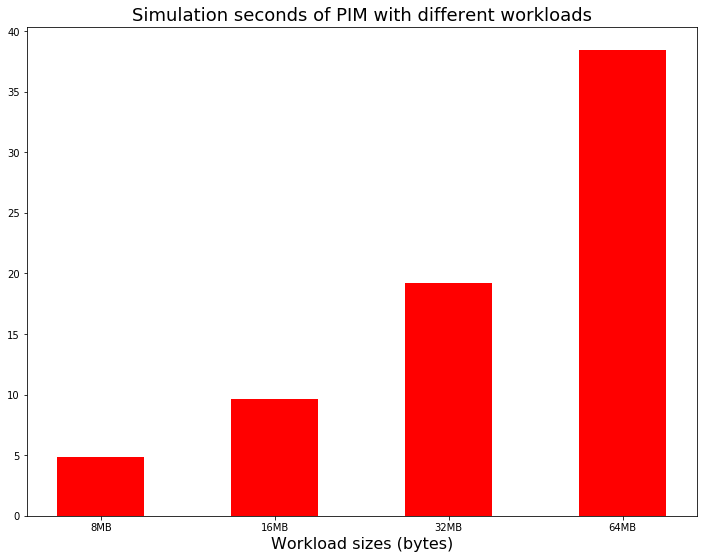

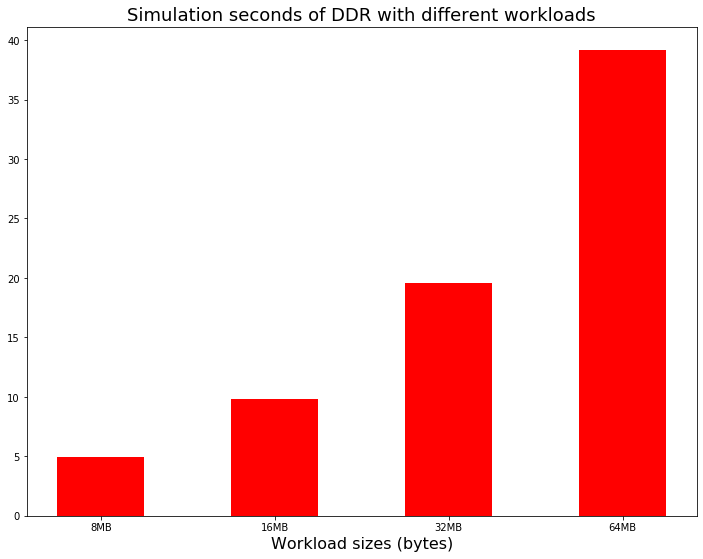

In [24]:
bargraph(data["Attributes"][10], "Simulation seconds")

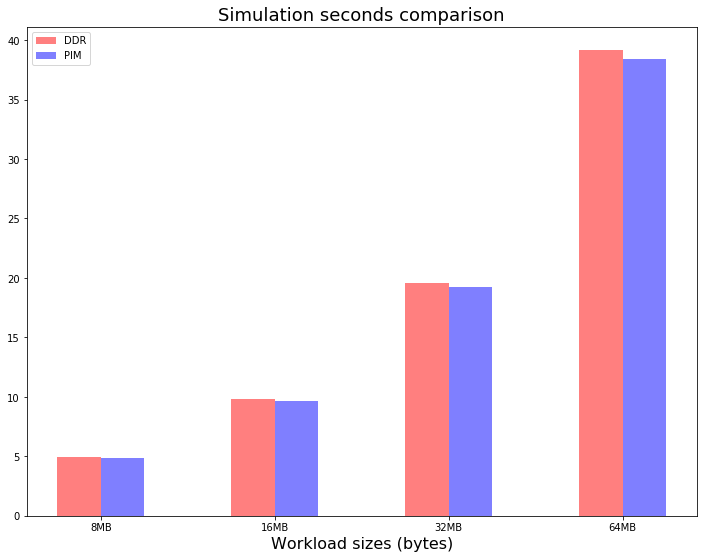

In [25]:
groupedbar(data["Attributes"][10], "Simulation seconds")

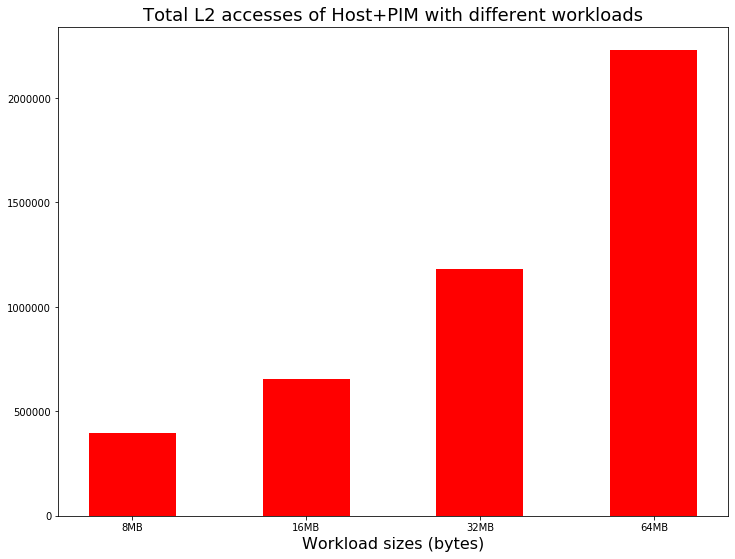

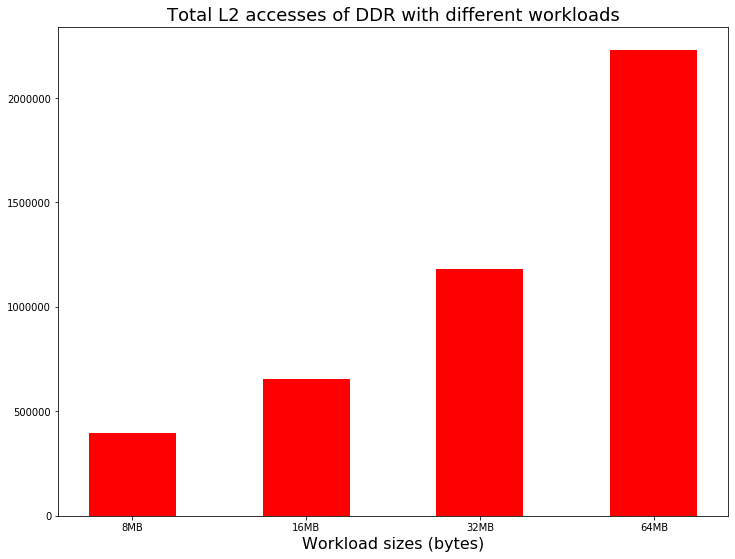

In [26]:
    li = data.loc[data["Attributes"]==data["Attributes"][11]]
    for index, rows in li.iterrows(): 
        li_values = [rows.DDR_8MB, rows.PIM_8MB, rows.DDR_16MB, rows.PIM_16MB, 
                  rows.DDR_32MB, rows.PIM_32MB, rows.DDR_64MB, rows.PIM_64MB]
    
    plt.bar(workloads, li_values[1::2], color ='red', width = 0.5)
    plt.xticks([0,1,2,3])
    plt.title("Total L2 accesses of Host+PIM with different workloads", fontsize=18) 
    plt.xlabel('Workload sizes (bytes)', fontsize=16)
    plt.show()

    plt.bar(workloads, li_values[::2], color ='red', width = 0.5)
    plt.xticks([0,1,2,3])
    plt.title("Total L2 accesses of DDR with different workloads", fontsize=18) 
    plt.xlabel('Workload sizes (bytes)', fontsize=16)
    plt.show()

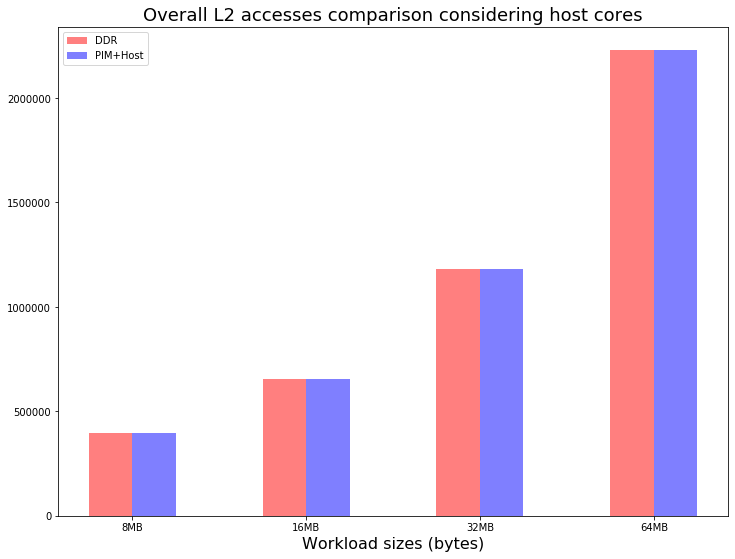

In [27]:
    pos = list(range(4)) 
    width = 0.25 
    li = data.loc[data["Attributes"]==data["Attributes"][11]]
    for index, rows in li.iterrows(): 
        li_values = [rows.DDR_8MB, rows.PIM_8MB, rows.DDR_16MB, rows.PIM_16MB, 
                  rows.DDR_32MB, rows.PIM_32MB, rows.DDR_64MB, rows.PIM_64MB]

    fig, ax = plt.subplots(figsize=(12,9))
    plt.bar(pos, li_values[::2], width, alpha=0.5, color='red') 
    plt.bar([p + width for p in pos], li_values[1::2], width, alpha=0.5, color='blue') 

    ax.set_title('Overall L2 accesses comparison considering host cores', fontsize=18)
    ax.set_xticks([p + 0.5 * width for p in pos])
    ax.set_xticklabels(workloads)

    plt.legend(['DDR','PIM+Host'], loc='upper left')
    plt.xlabel('Workload sizes (bytes)',fontsize=16)
    # plt.grid()
    plt.show()

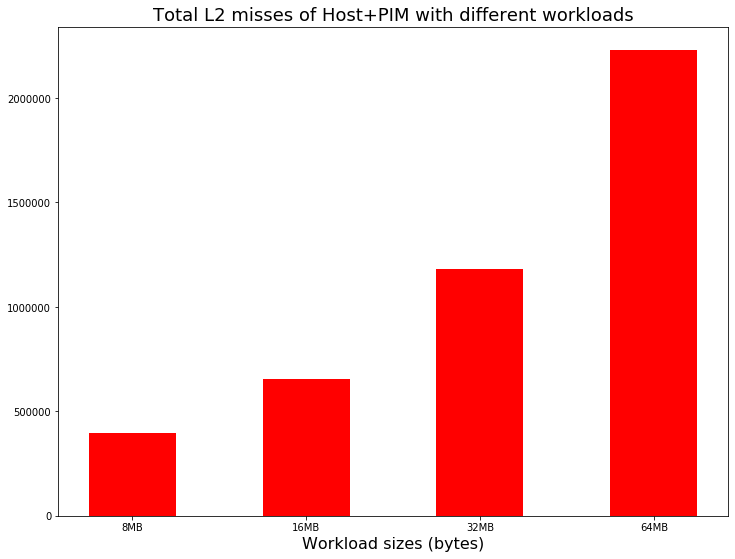

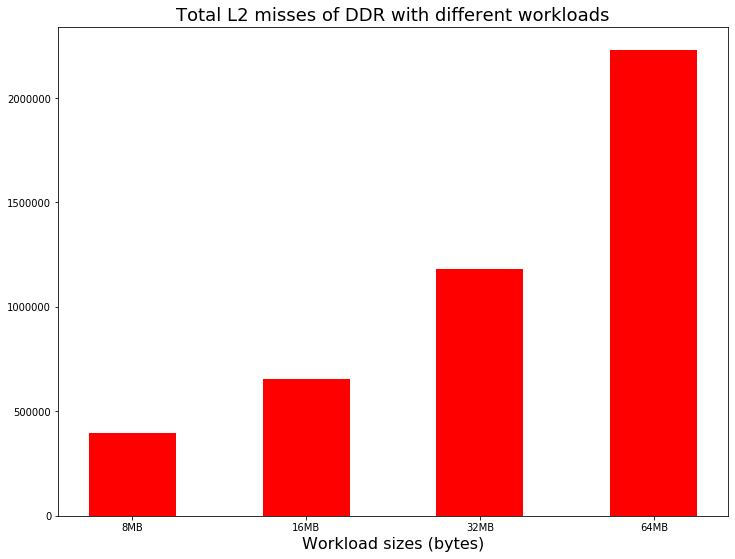

In [28]:
    li = data.loc[data["Attributes"]==data["Attributes"][12]]
    for index, rows in li.iterrows(): 
        li_values = [rows.DDR_8MB, rows.PIM_8MB, rows.DDR_16MB, rows.PIM_16MB, 
                  rows.DDR_32MB, rows.PIM_32MB, rows.DDR_64MB, rows.PIM_64MB]
    
    plt.bar(workloads, li_values[1::2], color ='red', width = 0.5)
    plt.xticks([0,1,2,3])
    plt.title("Total L2 misses of Host+PIM with different workloads", fontsize=18) 
    plt.xlabel('Workload sizes (bytes)', fontsize=16)
    plt.show()

    plt.bar(workloads, li_values[::2], color ='red', width = 0.5)
    plt.xticks([0,1,2,3])
    plt.title("Total L2 misses of DDR with different workloads", fontsize=18) 
    plt.xlabel('Workload sizes (bytes)', fontsize=16)
    plt.show()

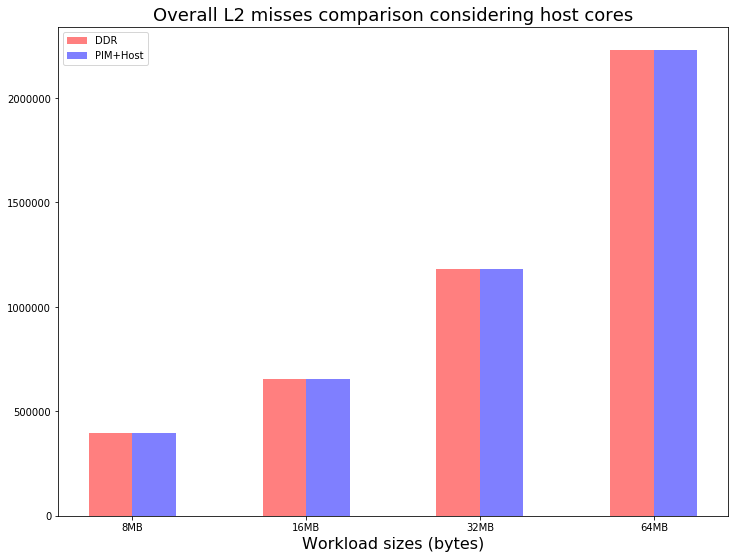

In [29]:
    pos = list(range(4)) 
    width = 0.25 
    li = data.loc[data["Attributes"]==data["Attributes"][12]]
    for index, rows in li.iterrows(): 
        li_values = [rows.DDR_8MB, rows.PIM_8MB, rows.DDR_16MB, rows.PIM_16MB, 
                  rows.DDR_32MB, rows.PIM_32MB, rows.DDR_64MB, rows.PIM_64MB]

    fig, ax = plt.subplots(figsize=(12,9))
    plt.bar(pos, li_values[::2], width, alpha=0.5, color='red') 
    plt.bar([p + width for p in pos], li_values[1::2], width, alpha=0.5, color='blue') 

    ax.set_title('Overall L2 misses comparison considering host cores', fontsize=18)
    ax.set_xticks([p + 0.5 * width for p in pos])
    ax.set_xticklabels(workloads)

    plt.legend(['DDR','PIM+Host'], loc='upper left')
    plt.xlabel('Workload sizes (bytes)',fontsize=16)
    # plt.grid()
    plt.show()